# TASK -- Part 1B

# =============================================

# This script contains supplemental visualizations to help answer key questions from the Project Brief for the Instacart Final Report.

# =============================================

# Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path

path = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 4/Instacart Basket Analysis'

In [3]:
# Import data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'instacart_dataframe.pkl'))

In [4]:
# Check output

df.shape

(32404859, 37)

In [5]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,date_joined,#_of_dependents,marital_status,income,region,activity_flag,age_range,income_range,department_name,day_ordered
0,2539329,1,1,2,8,0.0,196,1,0,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Monday
1,2398795,1,2,3,7,15.0,196,1,1,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Tuesday
2,473747,1,3,3,12,21.0,196,1,1,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Tuesday
3,2254736,1,4,4,7,29.0,196,1,1,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Wednesday
4,431534,1,5,4,15,28.0,196,1,1,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Wednesday


In [6]:
# Check variable list

df.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_day_of_week            int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
mean_spending              float64
Spender_type                object
median_ord_freq            float64
customer_frequency          object
gender                      object
state                       object
age                          int64
date_joined                 object
#_of_dependents     

# Create additional visualizations

# Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts. 

In [7]:
df['price_range_loc'].value_counts(dropna=False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

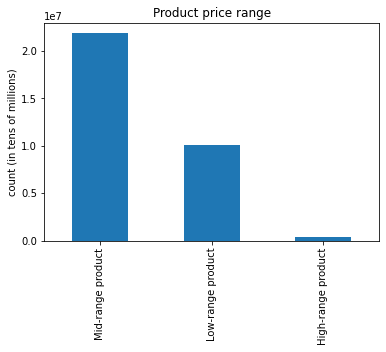

In [8]:
# Create visual

bar_price_range = df['price_range_loc'].value_counts().plot.bar(title='Product price range', ylabel='count (in tens of millions)')

In [9]:
# Export

bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range.png'))

# Are there differences in ordering habits based on a customer’s loyalty status?

In [9]:
df['loyalty_flag'].value_counts(dropna=False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [10]:
# Cross busiest_period_of_day with loyalty_flag

cross_loyal_busy = pd.crosstab(df['loyalty_flag'], df['busiest_period_of_day'], dropna=False)

In [11]:
cross_loyal_busy

busiest_period_of_day,Average orders,Fewest orders,Most orders
loyalty_flag,,,
Loyal customer,5896423,107573,4280097
New customer,3540843,81612,2621535
Regular customer,9079900,188374,6608502


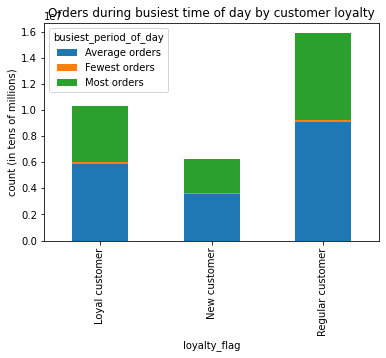

In [21]:
bar_loyal_busy = cross_loyal_busy.plot(kind='bar', stacked=True, title='Orders during busiest time of day by customer loyalty', ylabel='count (in tens of millions)')


In [14]:
bar_loyal_busy.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyal_busy.png'))

# Are there differences in ordering habits based on a customer’s region? 

In [23]:
# Examine relationship between mean_spending and region

cross_spend_region = pd.crosstab(df['region'], df['mean_spending'], dropna=False)

In [24]:
cross_spend_region

mean_spending,1.000000,1.100000,1.200000,1.262500,1.300000,1.308333,1.333333,1.350000,1.360000,1.400000,...,7700.025641,8703.400000,8794.882427,10209.987755,10721.342857,11772.100000,12506.925000,14042.512281,15006.940000,25005.425000
region,,,,,,,,,,,,,,,,,,,,,
Midwest,7,4,0,0,14,0,3,0,0,0,...,0,0,239,0,0,0,8,0,0,4
Northeast,0,17,8,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
South,3,6,0,8,3,12,0,0,5,3,...,0,0,0,0,28,17,0,57,40,0
West,8,0,0,0,10,0,0,4,0,0,...,39,23,0,49,0,0,0,0,0,0


In [25]:
cross_spendtype_region = pd.crosstab(df['region'], df['Spender_type'], dropna=False)

In [26]:
cross_spendtype_region

Spender_type,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


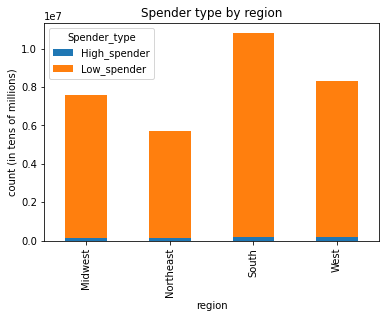

In [31]:
bar_spendtype_region = cross_spendtype_region.plot(kind='bar', ylabel='count (in tens of millions)', title='Spender type by region', stacked=True)

In [20]:
# Export

bar_spendtype_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spendtype_region.png'))

# Is there a connection between age and family status in terms of ordering habits? 

In [32]:
# Create crosstab between age_range and marital_status

cross_age_status = pd.crosstab(df['marital_status'], df['age_range'], dropna=False)

In [33]:
cross_age_status

age_range,18-24 year olds,25-34 year olds,35-44 year olds,45-54 year olds,55-64 year olds,65 and over
marital_status,,,,,,
divorced/widowed,0,0,0,0,511231,2260581
living with parents and siblings,1550603,0,0,0,0,0
married,767154,3383576,3414350,3459284,3332550,8399839
single,746182,1163735,1132281,1131640,656775,495078


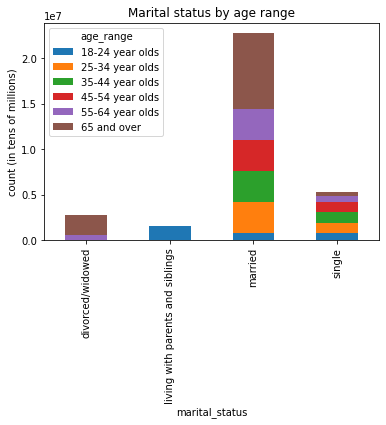

In [34]:
bar_age_status = cross_age_status.plot(kind='bar', stacked=True, ylabel='count (in tens of millions)', title='Marital status by age range')

In [24]:
# Export

bar_age_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_status.png'))

# Check a few variables for their delineations

In [35]:
# Check income_range

df['income_range'].value_counts(dropna=False)

50,000-99,999       13996010
100,000-149,999     10763185
150,000-199,999      3793138
0-49,999             3594083
200,000 and over      258443
Name: income_range, dtype: int64

In [36]:
# Create new names for income levels

result = []

for value in df['income_range']:
    if (value in ['0-49,999']):
        result.append('Low income')
    elif (value in ['50,000-99,999','100,000-149,999']):
        result.append('Middle income')
    else:
        result.append('Upper income')

In [37]:
# Define new variable

df['income_bracket'] = result

In [38]:
df['income_bracket'].value_counts(dropna=False)

Middle income    24759195
Upper income      4051581
Low income        3594083
Name: income_bracket, dtype: int64

In [39]:
# Check output

df.shape

(32404859, 38)

In [40]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,#_of_dependents,marital_status,income,region,activity_flag,age_range,income_range,department_name,day_ordered,income_bracket
0,2539329,1,1,2,8,0.0,196,1,0,both,...,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Monday,Low income
1,2398795,1,2,3,7,15.0,196,1,1,both,...,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Tuesday,Low income
2,473747,1,3,3,12,21.0,196,1,1,both,...,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Tuesday,Low income
3,2254736,1,4,4,7,29.0,196,1,1,both,...,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Wednesday,Low income
4,431534,1,5,4,15,28.0,196,1,1,both,...,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Wednesday,Low income


In [41]:
# Check age_range for labels

df['age_range'].value_counts(dropna=False)

65 and over        11155498
45-54 year olds     4590924
25-34 year olds     4547311
35-44 year olds     4546631
55-64 year olds     4500556
18-24 year olds     3063939
Name: age_range, dtype: int64

In [42]:
# Create new names for age_range

age_names = []

for value in df['age_range']:
    if (value in ['18-24 year olds']):
        age_names.append('Young adult')
    elif (value in ['25-34 year olds','35-44 year olds']):
        age_names.append('Adult')
    elif (value in ['45-54 year olds','55-64 year olds']):
        age_names.append('Middle-age adult')
    else:
        age_names.append('Senior')
    

In [43]:
# Define new variable

df['age_bracket'] = age_names

In [44]:
df['age_bracket'].value_counts(dropna=False)

Senior              11155498
Adult                9093942
Middle-age adult     9091480
Young adult          3063939
Name: age_bracket, dtype: int64

In [45]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,marital_status,income,region,activity_flag,age_range,income_range,department_name,day_ordered,income_bracket,age_bracket
0,2539329,1,1,2,8,0.0,196,1,0,both,...,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Monday,Low income,Adult
1,2398795,1,2,3,7,15.0,196,1,1,both,...,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Tuesday,Low income,Adult
2,473747,1,3,3,12,21.0,196,1,1,both,...,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Tuesday,Low income,Adult
3,2254736,1,4,4,7,29.0,196,1,1,both,...,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Wednesday,Low income,Adult
4,431534,1,5,4,15,28.0,196,1,1,both,...,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Wednesday,Low income,Adult


In [46]:
# Create new children bracket

df.loc[df['#_of_dependents'] == 0, 'children'] = 'No children'

In [47]:
df.loc[df['#_of_dependents'] >= 1, 'children'] = 'Children'

In [48]:
# Check code

df['children'].value_counts(dropna=False)

Children       24307356
No children     8097503
Name: children, dtype: int64

In [47]:
# Export df as csv for safety

df.to_csv(os.path.join(path, '02 Data', 'Prepared data', 'instacart_dataframe_v2.csv'))

# What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of. 

# Examine the profile "Young parent"
# Variables: "Young adult", "children"

In [49]:
# Crosstab for age bracket and children

cross_age_nokids = pd.crosstab(df['age_bracket'], df['children'], dropna=False)

In [50]:
cross_age_nokids

children,Children,No children
age_bracket,,
Adult,6797926,2296016
Middle-age adult,6791834,2299646
Senior,8399839,2755659
Young adult,2317757,746182


In [51]:
# Create vars_list to filter needed columns

vars_list = ['order_id','user_id', 'age_bracket', 'marital_status', 'children', 'income_bracket','department_name', 'region']

In [52]:
# Import data to focus on young parents

parents = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'instacart_dataframe_v2.csv'), usecols=vars_list)

In [53]:
# Check output

parents.shape

(32404859, 8)

In [54]:
parents.head()

,order_id,user_id,marital_status,region,department_name,income_bracket,age_bracket,children
0,2539329,1,married,South,Beverages,Low income,Adult,Children
1,2398795,1,married,South,Beverages,Low income,Adult,Children
2,473747,1,married,South,Beverages,Low income,Adult,Children
3,2254736,1,married,South,Beverages,Low income,Adult,Children
4,431534,1,married,South,Beverages,Low income,Adult,Children


In [55]:
# Create subset filtering for children and young adult age bracket

parent_young = parents[(parents['children']=='Children') & (parents['age_bracket']=='Young adult')]

In [56]:
# Check output

parent_young.head()

,order_id,user_id,marital_status,region,department_name,income_bracket,age_bracket,children
6293,1442654,1137,living with parents and siblings,Midwest,Beverages,Middle income,Young adult,Children
6294,289494,1137,living with parents and siblings,Midwest,Beverages,Middle income,Young adult,Children
6295,147278,1137,living with parents and siblings,Midwest,Beverages,Middle income,Young adult,Children
6296,2546034,1137,living with parents and siblings,Midwest,Beverages,Middle income,Young adult,Children
6297,1682164,1137,living with parents and siblings,Midwest,Produce,Middle income,Young adult,Children


In [57]:
parent_young['children'].value_counts(dropna=False)

Children    2317757
Name: children, dtype: int64

In [58]:
parent_young['age_bracket'].value_counts(dropna=False)

Young adult    2317757
Name: age_bracket, dtype: int64

In [59]:
# Examine region and department for young adult with children

cross_dept = pd.crosstab(parent_young['region'], parent_young['department_name'], dropna=False)

In [60]:
cross_dept

department_name,Alcohol,Babies,Bakery,Beverages,Breakfast,Bulk,Canned goods,Dairy eggs,Deli,Dry goods pasta,...,Household,International,Meat Seafood,Missing,Other,Pantry,Personal Care,Pets,Produce,Snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,3519,7333,19677,44464,11447,557,18883,90828,18012,15077,...,13392,4722,12450,1301,639,32923,7483,2195,157703,46204
Northeast,1748,5572,14464,34668,9734,463,13084,68992,13639,11069,...,9157,3436,8454,864,496,23351,5318,1064,118592,37891
South,4781,10158,28292,62959,17863,888,25523,132509,25482,20441,...,17627,6546,16997,1807,906,45005,10633,2335,228967,69840
West,2590,7019,20891,45334,13088,623,19030,95959,17681,15700,...,12661,4739,13462,1314,674,33209,8124,1917,169703,52635


In [61]:
cross_dept.T

region,Midwest,Northeast,South,West
department_name,,,,
Alcohol,3519,1748,4781,2590
Babies,7333,5572,10158,7019
Bakery,19677,14464,28292,20891
Beverages,44464,34668,62959,45334
Breakfast,11447,9734,17863,13088
Bulk,557,463,888,623
Canned goods,18883,13084,25523,19030
Dairy eggs,90828,68992,132509,95959
Deli,18012,13639,25482,17681


In [62]:
# Create subset focused on Babies department only

babies_dept = parent_young[parent_young['department_name']=='Babies']

In [63]:
babies_dept['income_bracket'].value_counts(dropna=False)

Middle income    26574
Low income        3380
Upper income       128
Name: income_bracket, dtype: int64

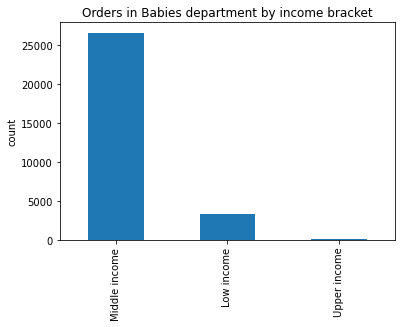

In [64]:
# Create bar visual

bar_babies_income = babies_dept['income_bracket'].value_counts().plot.bar(ylabel='count', title='Orders in Babies department by income bracket')

In [65]:
cross_income_babies = pd.crosstab(df['income_bracket'], df['department_name'], dropna=False)

In [66]:
cross_income_babies

department_name,Alcohol,Babies,Bakery,Beverages,Breakfast,Bulk,Canned goods,Dairy eggs,Deli,Dry goods pasta,...,Household,International,Meat Seafood,Missing,Other,Pantry,Personal Care,Pets,Produce,Snacks
income_bracket,,,,,,,,,,,,,,,,,,,,,
Low income,19808,30858,114709,405505,97368,4889,86652,535079,114096,70641,...,94179,23441,37065,7240,4183,179432,51755,9312,882102,592279
Middle income,108935,338511,903665,1957471,518808,25911,842648,4179327,806151,684723,...,547705,211527,576132,53165,27359,1453647,339763,74890,7417712,1978277
Upper income,24953,54433,154054,325147,86857,3773,138758,684341,131002,111263,...,96782,34285,95730,8740,4749,242290,56054,13514,1179477,316994


In [67]:
cross_income_babies['Babies']

income_bracket
Low income        30858
Middle income    338511
Upper income      54433
Name: Babies, dtype: int64

In [68]:
# Normalize figures

low_inc_yp_norm = (3380/30858)*100

In [69]:
mid_inc_yp_norm = (26574/338511)*100

In [70]:
upper_inc_yp_norm = (128/54433)*100

In [71]:
# These figures represent the percentages of each young parent's income level
# against the total of each respective income level

print(low_inc_yp_norm, mid_inc_yp_norm, upper_inc_yp_norm)

10.953399442608076 7.850261882184036 0.2351514706152518


In [72]:
# Check normalizations against each other by all and young parents

total_income_count = sum(cross_income_babies['Babies'])

In [73]:
total_income_count

423802

In [74]:
total_low_inc_norm = (30858/423802)*100

In [75]:
total_mid_inc_norm = (338511/423802)*100

In [76]:
total_upper_inc_norm = (54433/423802)*100

In [77]:
# These figures represent respective percentages of each income level 
# against the all users with orders in 'Babies' variable

print(total_low_inc_norm,
     total_mid_inc_norm,
     total_upper_inc_norm)

7.281230385887749 79.87480002453977 12.84396958957249


In [78]:
yp_income_count = (26574+3380+128)

In [79]:
print(yp_income_count)

30082


In [80]:
yp_low_inc_norm = (3380/30082)*100

In [81]:
yp_mid_inc_norm = (26574/30082)*100

In [82]:
yp_upper_inc_norm = (128/30082)*100

In [83]:
# These figures represent respective percentages of each income level 
# against the totals of only young parents with orders in 'Babies' variable

print(yp_low_inc_norm, yp_mid_inc_norm, yp_upper_inc_norm)

11.235955056179774 88.33854132039093 0.42550362342929327


In [84]:
# Examine babies department across regions

cross_babies = pd.crosstab(babies_dept['region'], babies_dept['income_bracket'])

In [85]:
cross_babies

income_bracket,Low income,Middle income,Upper income
region,,,
Midwest,755,6567,11
Northeast,437,5134,1
South,1434,8613,111
West,754,6260,5


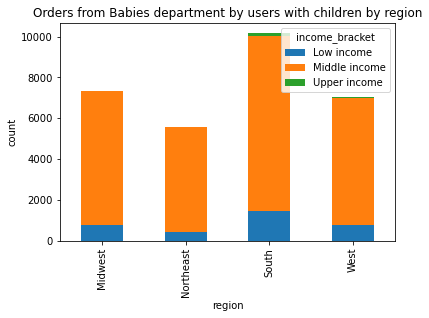

In [87]:
bar_babies = cross_babies.plot(kind='bar',stacked=True, title='Orders from Babies department by users with children by region', ylabel='count')

In [85]:
# Export png

bar_babies.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_babies.png'))

In [77]:
# Export parent_young for safety

parent_young.to_csv(os.path.join(path, '02 Data', 'Prepared data', 'young_parents.csv'))

In [88]:
# Compare parent_young purchases by department against whole df.

parent_young['department_name'].value_counts(dropna=False)

Produce            674965
Dairy eggs         388288
Snacks             206570
Beverages          187425
Frozen             160980
Pantry             134488
Bakery              83324
Canned goods        76520
Deli                74814
Dry goods pasta     62287
Household           52837
Breakfast           52132
Meat Seafood        51363
Personal Care       31558
Babies              30082
International       19443
Alcohol             12638
Pets                 7511
Missing              5286
Other                2715
Bulk                 2531
Name: department_name, dtype: int64

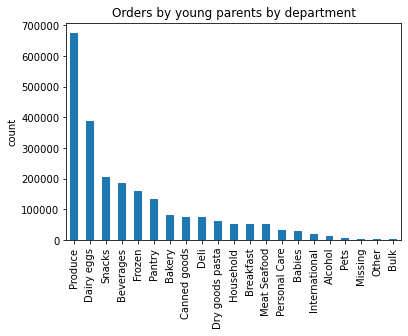

In [89]:
bar_py_dept = parent_young['department_name'].value_counts().plot.bar(title='Orders by young parents by department', ylabel='count')

In [90]:
df['department_name'].value_counts(dropna=False)

Produce            9479291
Dairy eggs         5398747
Snacks             2887550
Beverages          2688123
Frozen             2234743
Pantry             1875369
Bakery             1172428
Canned goods       1068058
Deli               1051249
Dry goods pasta     866627
Household           738666
Meat Seafood        708927
Breakfast           703033
Personal Care       447572
Babies              423802
International       269253
Alcohol             153696
Pets                 97716
Missing              69145
Other                36291
Bulk                 34573
Name: department_name, dtype: int64

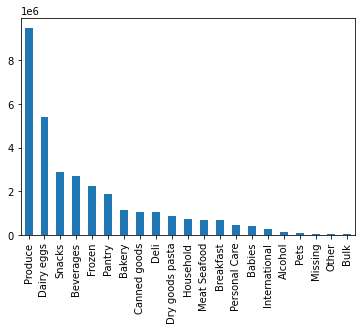

In [91]:
bar_all_dept = df['department_name'].value_counts().plot.bar()

In [92]:
df['activity_flag'].value_counts(dropna=False)

Regular activity    30964564
Low activity         1440295
Name: activity_flag, dtype: int64

In [93]:
df['price_range_loc'].value_counts(dropna=False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

# Check other young parent variables

In [94]:
# Import additional variables for df
vars_list_2 = ['order_id', 'user_id', 'price_range_loc', 'max_order', 'loyalty_flag', 'Spender_type', 'customer_frequency', 'region', 'activity_flag', 'income_bracket', 'department_name', 'day_ordered', 'age_bracket', 'children']


In [95]:
# Import new data

yp_2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'instacart_dataframe_v2.csv'), usecols=vars_list_2)

In [96]:
# Check output

yp_2.shape

(32404859, 14)

In [97]:
yp_2.head()

,order_id,user_id,price_range_loc,max_order,loyalty_flag,Spender_type,customer_frequency,region,activity_flag,department_name,day_ordered,income_bracket,age_bracket,children
0,2539329,1,Mid-range product,10,New customer,Low_spender,Regular customer,South,Regular activity,Beverages,Monday,Low income,Adult,Children
1,2398795,1,Mid-range product,10,New customer,Low_spender,Regular customer,South,Regular activity,Beverages,Tuesday,Low income,Adult,Children
2,473747,1,Mid-range product,10,New customer,Low_spender,Regular customer,South,Regular activity,Beverages,Tuesday,Low income,Adult,Children
3,2254736,1,Mid-range product,10,New customer,Low_spender,Regular customer,South,Regular activity,Beverages,Wednesday,Low income,Adult,Children
4,431534,1,Mid-range product,10,New customer,Low_spender,Regular customer,South,Regular activity,Beverages,Wednesday,Low income,Adult,Children


In [98]:
yp_2['children'].value_counts(dropna=False)

Children       24307356
No children     8097503
Name: children, dtype: int64

In [99]:
# Create subset for young parents purchasing in babies department

df_yp = yp_2[(yp_2['children']=='Children') & (yp_2['age_bracket']=='Young adult') & (yp_2['department_name']=='Babies')]

In [100]:
df_yp.shape

(30082, 14)

In [101]:
df_yp['children'].value_counts(dropna=False)

Children    30082
Name: children, dtype: int64

In [102]:
df_yp['age_bracket'].value_counts(dropna=False)

Young adult    30082
Name: age_bracket, dtype: int64

In [103]:
df_yp['department_name'].value_counts(dropna=False)

Babies    30082
Name: department_name, dtype: int64

In [152]:
# Export for safety

df_yp.to_csv(os.path.join(path, '02 Data', 'Prepared data', 'ic_young_parent_babies.csv'))

In [104]:
df_yp['loyalty_flag'].value_counts(dropna=False)

Regular customer    14003
Loyal customer      11795
New customer         4284
Name: loyalty_flag, dtype: int64

In [105]:
df_yp['price_range_loc'].value_counts(dropna=False)

Mid-range product    21303
Low-range product     8779
Name: price_range_loc, dtype: int64

In [106]:
# Exmaine relationship between loyalty and price range

yp_loyal_price = pd.crosstab(df_yp['loyalty_flag'], df_yp['price_range_loc'], dropna=False)

In [107]:
yp_loyal_price

price_range_loc,Low-range product,Mid-range product
loyalty_flag,,
Loyal customer,3306,8489
New customer,1297,2987
Regular customer,4176,9827


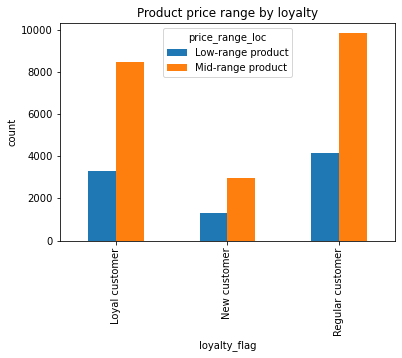

In [108]:
bar_loyal_price = yp_loyal_price.plot(kind='bar', ylabel='count', title='Product price range by loyalty')

In [150]:
# Export image

bar_loyal_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyal_price.png'))

In [153]:
# When are middle income loyal customers making purchases?

df_middle_loyal = df_yp[(df_yp['loyalty_flag']=='Loyal customer') & (df_yp['income_bracket']=='Middle income')]

In [154]:
df_middle_loyal.shape

(10553, 14)

In [155]:
df_middle_loyal.head()

,order_id,user_id,price_range_loc,max_order,loyalty_flag,Spender_type,customer_frequency,region,activity_flag,department_name,day_ordered,income_bracket,age_bracket,children
98064,703917,17115,Mid-range product,43,Loyal customer,Low_spender,Frequent customer,Midwest,Regular activity,Babies,Friday,Middle income,Young adult,Children
98142,1227959,17115,Mid-range product,43,Loyal customer,Low_spender,Frequent customer,Midwest,Regular activity,Babies,Tuesday,Middle income,Young adult,Children
98143,1780991,17115,Mid-range product,43,Loyal customer,Low_spender,Frequent customer,Midwest,Regular activity,Babies,Sunday,Middle income,Young adult,Children
98144,2021830,17115,Mid-range product,43,Loyal customer,Low_spender,Frequent customer,Midwest,Regular activity,Babies,Thursday,Middle income,Young adult,Children
98145,289394,17115,Low-range product,43,Loyal customer,Low_spender,Frequent customer,Midwest,Regular activity,Babies,Sunday,Middle income,Young adult,Children


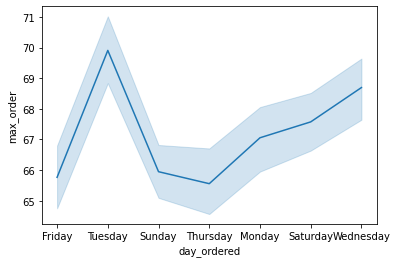

In [156]:
line_middle_loyal = sns.lineplot(data = df_middle_loyal, x = 'day_ordered', y = 'max_order')

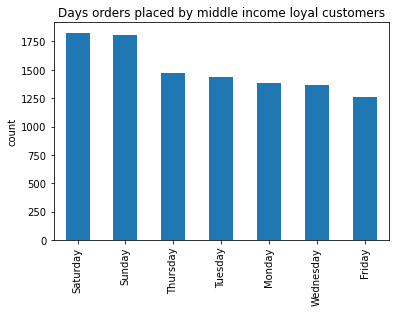

In [158]:
bar_middle_loyal = df_middle_loyal['day_ordered'].value_counts().plot.bar(ylabel='count', title='Days orders placed by middle income loyal customers')

In [160]:
# Export bar chart

bar_middle_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_middle_loyal.png')) 

In [163]:
# At what price levels are young parents purhcasing in the "Babies" department?

cross_price_income = pd.crosstab(df_yp['income_bracket'], df_yp['price_range_loc'], dropna=False)

In [164]:
cross_price_income

price_range_loc,Low-range product,Mid-range product
income_bracket,,
Low income,1131,2249
Middle income,7614,18960
Upper income,34,94


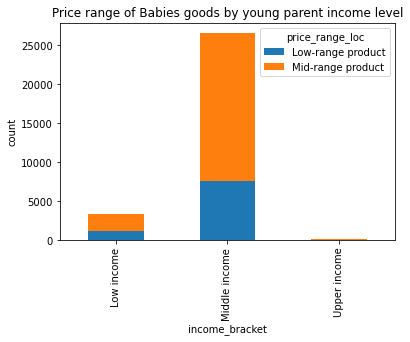

In [166]:
bar_price_income = cross_price_income.plot(kind='bar', stacked=True, ylabel='count', title='Price range of Babies goods by young parent income level')

In [167]:
# Export bar chart

bar_price_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_income.png'))

In [168]:
# Export middle_loyal df

df_middle_loyal.to_csv(os.path.join(path, '02 Data', 'Prepared data', 'parents_middle_loyal.csv'))